CNN

In [6]:
!pip install tensorflow opencv-python matplotlib

In [7]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
!pip install pillow
from matplotlib import pyplot as plt
from google.colab import drive

<ipython-input-7-ea0c4a9e7b9b>:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data_dir = '/content/drive/My Drive/data'

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [11]:
import os
from PIL import Image

image_exts = ['jpeg', 'jpg', 'png', 'bmp']

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        try:
            # Try to open the image with Pillow
            with Image.open(image_path) as img:
                tip = img.format.lower()  # e.g., 'jpeg', 'png', etc.
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')
            # Optionally remove the problematic image
            os.remove(image_path)

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2410 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
#Class 1 = sad, Class 0 = happy
batch[1]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

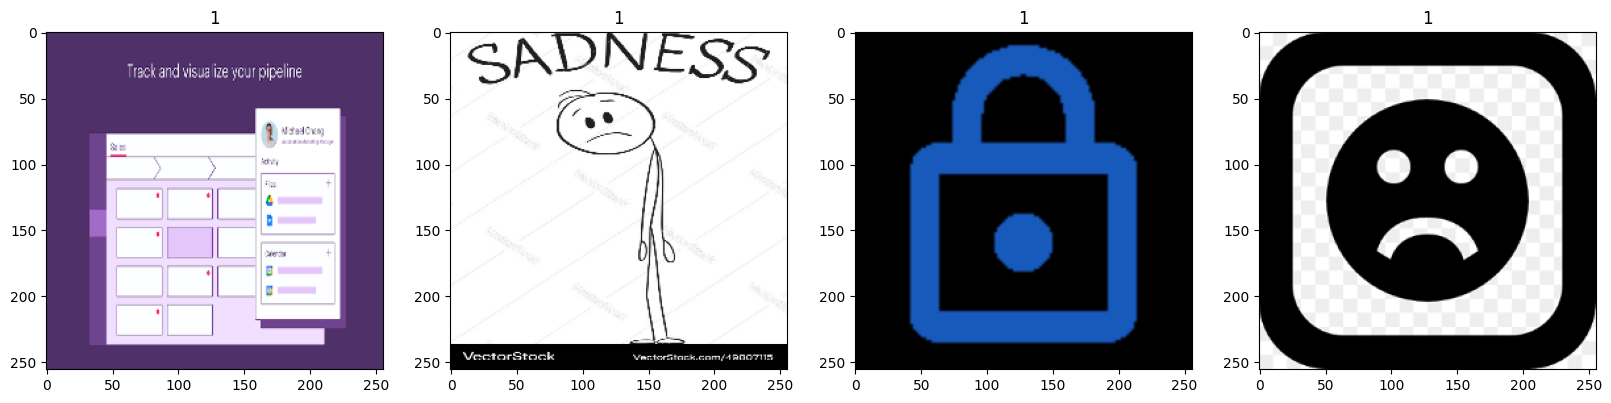

In [16]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.map(lambda x,y: (x/255,y))
data.as_numpy_iterator().next()

(array([[[[0.57329583, 0.7144723 , 0.70662916],
          [0.5674326 , 0.70860904, 0.7007659 ],
          [0.57193244, 0.7091873 , 0.69350106],
          ...,
          [0.10987286, 0.22691482, 0.23021983],
          [0.10145527, 0.20341605, 0.20733762],
          [0.04540441, 0.1473652 , 0.15128677]],
 
         [[0.57782245, 0.72341067, 0.71703815],
          [0.5683479 , 0.7120404 , 0.7033586 ],
          [0.5760838 , 0.7118681 , 0.7005936 ],
          ...,
          [0.06352635, 0.17633273, 0.18175551],
          [0.16616881, 0.2664522 , 0.2682713 ],
          [0.1790173 , 0.27803692, 0.2804879 ]],
 
         [[0.5717524 , 0.72469366, 0.7207721 ],
          [0.5581993 , 0.7092448 , 0.70090765],
          [0.58134955, 0.71770835, 0.7122741 ],
          ...,
          [0.01814491, 0.12036229, 0.12578508],
          [0.08526731, 0.18275505, 0.18107   ],
          [0.13151042, 0.22562806, 0.22562806]],
 
         ...,
 
         [[0.6177045 , 0.7683824 , 0.71728706],
          [0.63446

In [18]:
len(data)

76

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logdir = '/content/drive/My Drive/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=5,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6715 - loss: 0.6533 - val_accuracy: 0.6914 - val_loss: 0.6182
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.6960 - loss: 0.6022 - val_accuracy: 0.7168 - val_loss: 0.5570
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.7222 - loss: 0.5381 - val_accuracy: 0.7266 - val_loss: 0.5532
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.7558 - loss: 0.4869 - val_accuracy: 0.7109 - val_loss: 0.5793
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.7908 - loss: 0.4538 - val_accuracy: 0.7324 - val_loss: 0.5458


In [30]:
hist.history

{'accuracy': [0.682193398475647,
  0.6904481053352356,
  0.7228773832321167,
  0.755306601524353,
  0.7930424809455872],
 'loss': [0.6374202966690063,
  0.5972906947135925,
  0.5467076897621155,
  0.49389156699180603,
  0.44008931517601013],
 'val_accuracy': [0.69140625, 0.716796875, 0.7265625, 0.7109375, 0.732421875],
 'val_loss': [0.6182272434234619,
  0.5570429563522339,
  0.5532158017158508,
  0.5792848467826843,
  0.545815646648407]}

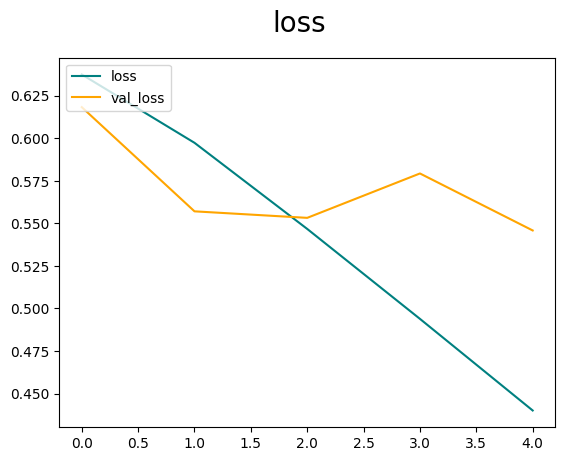

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

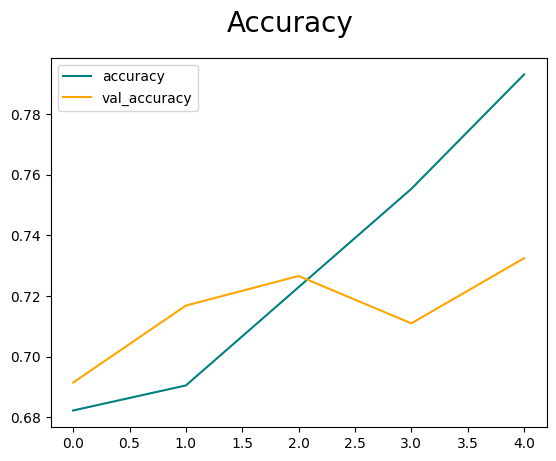

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
       X, y = batch
       yhat = model.predict(X)
       yhat = tf.round(yhat) #convert yhat to class labels
       pre.update_state(y, yhat)
       re.update_state(y, yhat)
       acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


In [35]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result()}')

Precision:0.753164529800415, Recall:0.8561151027679443, Accuracy:0.7079207897186279


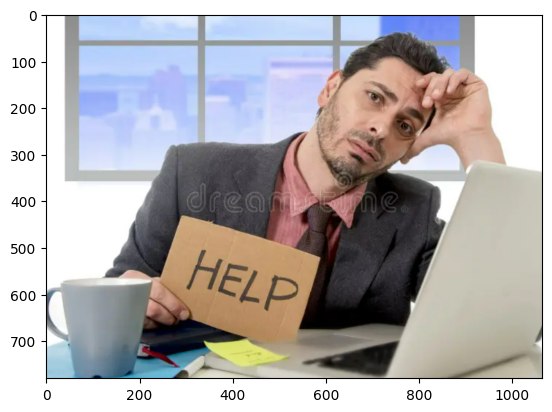

In [36]:
img1 = cv2.imread('sd.png')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

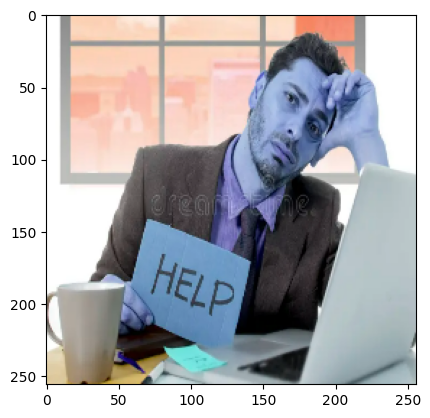

In [37]:
resize = tf.image.resize(img1,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
np.expand_dims(resize/255,0)

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.85490197, 0.78431374, 0.5921569 ],
         [0.86124384, 0.79053354, 0.6062198 ]

In [39]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [40]:
yhat

array([[0.96316415]], dtype=float32)

In [41]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [42]:
from tensorflow.keras.models import load_model

In [49]:
model.save('happysadclassifier.keras')

HYBRID QNN

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [44]:
# Remove all conflicting packages and install verified compatible versions
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-ibmq-provider qiskit-machine-learning qiskit-ibm-runtime
!pip install "qiskit==1.4.2"
!pip install "qiskit-machine-learning==0.7.0"
!pip install "qiskit-aer==0.17.0"
!pip install "qiskit-ibm-runtime==0.21.0"
!pip install numpy==1.23.5 scipy==1.14.1

Found existing installation: qiskit 1.4.2
Uninstalling qiskit-1.4.2:
  Successfully uninstalled qiskit-1.4.2
  Using cached qiskit-1.4.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.4.2-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
  Using cached qiskit_machine_learning-0.7.0-py3-none-any.whl.metadata (12 kB)
  Using cached qiskit_algorithms-0.3.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py) ... done
Using cached qiskit_machine_learning-0.7.0-py3-none-any.whl (96 kB)
Using cached qiskit_algorithms-0.3.1-py3-none-any.whl (310 kB)
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-linux_x86_64.whl size=542082 sha256=988e45aaddc2271771fa1e77229e4708b041fbec707c74f56fc850cc4f7a3e3a
  Stored in directory: /root/.cache/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [45]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms import NeuralNetworkClassifier
from qiskit_algorithms.optimizers import COBYLA, SPSA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer import AerSimulator

In [46]:
algorithm_globals.random_seed = 42
np.random.seed(42)

def check_and_mount_drive():
    """Check if running in Google Colab and mount drive if so."""
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        base_dir = '/content/drive/MyDrive/data'
        print("Running in Google Colab with Drive mounted")
        return base_dir, True
    except:
        base_dir = 'data'
        print("Running locally")
        return base_dir, False

In [47]:
def load_images(directory, label, target_size=(32, 32)):
    """Load and preprocess images from a directory with improved normalization."""
    images = []
    labels = []

    if not os.path.exists(directory):
        print(f"Warning: Directory {directory} does not exist")
        return np.array([]), np.array([])

    print(f"Loading images from {directory}...")
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            img_path = os.path.join(directory, filename)
            try:
                # Open image and convert to grayscale
                img = Image.open(img_path).convert('L')
                # Resize image
                img = img.resize(target_size)
                # Convert to numpy array and normalize to [0, 1] with explicit float32 type
                img_array = np.array(img).astype(np.float32) / 255.0
                # Ensure pixel values are in [0, 1] range
                img_array = np.clip(img_array, 0, 1)
                # Flatten the image
                img_flat = img_array.flatten()

                images.append(img_flat)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    print(f"Loaded {len(images)} images")
    return np.array(images), np.array(labels)

In [48]:
def prepare_data(base_dir, target_size=(32, 32), n_qubits=4):
    """Load and prepare the image data for quantum classification with improved preprocessing."""
    # Define paths to image directories
    happy_dir = os.path.join(base_dir, 'happy')
    sad_dir = os.path.join(base_dir, 'sad')

    # Load images
    happy_images, happy_labels = load_images(happy_dir, 1, target_size) # 1 for happy
    sad_images, sad_labels = load_images(sad_dir, 0, target_size) # 0 for sad

    # Check if data was loaded successfully
    if len(happy_images) == 0 or len(sad_images) == 0:
        raise ValueError("No images found in one or both directories")

    # Combine datasets
    X = np.vstack((happy_images, sad_images))
    y = np.hstack((happy_labels, sad_labels))

    # After combining datasets, verify labels
    print("Unique labels before split:", np.unique(y))

    # Save original data for visualization later
    X_orig = X.copy()

    print(f"Dataset summary: {len(happy_images)} happy images, {len(sad_images)} sad images")

    # Apply PCA for dimensionality reduction - using more components
    print(f"Reducing dimensions from {X.shape[1]} to {n_qubits} using PCA...")
    pca = PCA(n_components=n_qubits, random_state=42)
    X_reduced = pca.fit_transform(X)
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.2f}")

    # Use StandardScaler for better numerical stability
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reduced)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

    return X_train, X_test, y_train, y_test, X_orig, pca, scaler

In [50]:
def create_quantum_model(n_qubits, callback=None):
    """Create a quantum neural network classifier with improved architecture."""
    print(f"Creating quantum neural network with {n_qubits} qubits...")

    # Create feature map for data encoding - increase reps for better encoding
    feature_map = ZZFeatureMap(feature_dimension=n_qubits, reps=3)

    # Create variational circuit for learning - increase reps for more expressivity
    ansatz = RealAmplitudes(n_qubits, reps=3)

    # Create full circuit
    circuit = feature_map.compose(ansatz)

    # Define observable for measurement - more sophisticated observable
    if n_qubits > 2:
        # For multi-qubit systems, use a more expressive observable
        observables = [SparsePauliOp.from_list([(f"Z{'I' * (n_qubits - 1)}", 1)])]
        for i in range(1, n_qubits):
            pauli_str = 'I' * i + 'Z' + 'I' * (n_qubits - i - 1)
            observables.append(SparsePauliOp.from_list([(pauli_str, 1)]))
        observable = sum(observables)
    else:
        observable = SparsePauliOp.from_list([(f"Z{'I' * (n_qubits - 1)}", 1)])

    # Create quantum neural network
    estimator = Estimator()
    qnn = EstimatorQNN(
        circuit=circuit,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        observables=observable,
        estimator=estimator
    )

    # Create classifier with more iterations and better optimizer
    initial_point = algorithm_globals.random.random(ansatz.num_parameters)
    optimizer = COBYLA(maxiter=150)  # Increased max iterations

    classifier = NeuralNetworkClassifier(
        neural_network=qnn,
        optimizer=optimizer,
        initial_point=initial_point,
        callback=callback  # Important: ensure callback is passed here
    )

    return classifier

In [51]:
def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    """Train the model and evaluate its performance with improved metrics."""
    # Setup callback for monitoring training
    callback_data = {"loss": [], "step": 0}

    def callback_fn(weights, obj_func_eval):
        callback_data["loss"].append(obj_func_eval)
        callback_data["step"] += 1
        if callback_data["step"] % 5 == 0:
            print(f"Training step: {callback_data['step']}, Loss: {obj_func_eval:.6f}")

    # Properly assign the callback
    classifier.callback = callback_fn

    # Train the model
    print("Training quantum neural network...")
    classifier.fit(X_train, y_train)

    # Plot training loss - ensure we have data to plot
    if callback_data["loss"]:
        plt.figure(figsize=(10, 6))
        plt.plot(callback_data["loss"])
        plt.title('Training Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.savefig('training_loss.png')
        plt.show()
    else:
        print("Warning: No loss data was collected during training")

    # Evaluate on test set
    print("Evaluating model on test set...")
    y_pred = classifier.predict(X_test)

    # Calculate and display metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Explicitly specify expected labels
    print(cm)

    print("\nClassification Report:")
    report = classification_report(
        y_test,
        y_pred,
        labels=[0, 1],  # Explicitly specify expected labels
        target_names=['Sad', 'Happy'],
        zero_division=0  # Handle zero division case
    )
    print(report)

    return classifier, y_pred


In [52]:
def create_image_classifier(classifier, pca, scaler, target_size=(32, 32)):
    """Create a function to classify new images."""
    def classify_image(image_path):
        """Classify a single image."""
        # Check if file exists
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            return None, None

        # Load and preprocess image
        img = Image.open(image_path).convert('L')
        img = img.resize(target_size)
        img_array = np.array(img).astype(np.float32) / 255.0
        img_array = np.clip(img_array, 0, 1)  # Ensure proper normalization
        img_flat = img_array.flatten()

        # Apply PCA and scaling
        img_reduced = pca.transform([img_flat])
        img_scaled = scaler.transform(img_reduced)

        # Make prediction
        prediction = classifier.predict(img_scaled)[0]
        probas = classifier.predict_proba(img_scaled)[0]

        # Get label and confidence
        label = "Happy" if prediction == 1 else "Sad"
        confidence = probas[1] if prediction == 1 else probas[0]

        # Display image with prediction
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap='gray', vmin=0, vmax=1)  # Explicit vmin/vmax
        plt.title(f"Prediction: {label} (Confidence: {confidence:.2f})")
        plt.axis('off')
        plt.show()

        return label, confidence

    return classify_image


In [53]:
def visualize_results(X_test, y_test, y_pred, X_orig, pca, scaler, n_samples=3):
    """Visualize classification results with improved image handling."""
    # Create figure for visualization
    fig, axes = plt.subplots(2, n_samples, figsize=(12, 8))

    # Get indices of correct and incorrect predictions
    correct_idx = np.where(y_test == y_pred)[0]
    incorrect_idx = np.where(y_test != y_pred)[0]

    # Function to find original image from PCA-transformed point
    def find_original_image(x_test_idx):
        # Get test point
        test_point = X_test[x_test_idx]

        # Inverse transform to get back to original dimensions
        inverse_pca = scaler.inverse_transform([test_point])[0]
        approx_orig = pca.inverse_transform([inverse_pca])[0]
        approx_orig = np.clip(approx_orig, 0, 1)  # Ensure proper normalization

        # Find closest original image
        distances = np.sum((X_orig - approx_orig)**2, axis=1)
        closest_idx = np.argmin(distances)

        return closest_idx

    # Show correctly classified examples
    for i in range(n_samples):
        if i < len(correct_idx):
            idx = correct_idx[i]
            orig_idx = find_original_image(idx)

            # Get original image dimensions
            img_size = int(np.sqrt(X_orig.shape[1]))
            img = X_orig[orig_idx].reshape((img_size, img_size))

            # Ensure proper display with explicit vmin/vmax
            axes[0, i].imshow(img, cmap='gray', vmin=0, vmax=1)
            pred = "Happy" if y_pred[idx] == 1 else "Sad"
            axes[0, i].set_title(f"Correct: {pred}")
            axes[0, i].axis('off')
        else:
            axes[0, i].axis('off')

    # Show incorrectly classified examples
    for i in range(n_samples):
        if i < len(incorrect_idx):
            idx = incorrect_idx[i]
            orig_idx = find_original_image(idx)

            # Get original image dimensions
            img_size = int(np.sqrt(X_orig.shape[1]))
            img = X_orig[orig_idx].reshape((img_size, img_size))

            # Ensure proper display with explicit vmin/vmax
            axes[1, i].imshow(img, cmap='gray', vmin=0, vmax=1)
            pred = "Happy" if y_pred[idx] == 1 else "Sad"
            true = "Happy" if y_test[idx] == 1 else "Sad"
            axes[1, i].set_title(f"Pred: {pred}, True: {true}")
            axes[1, i].axis('off')
        else:
            axes[1, i].axis('off')

    plt.tight_layout()
    plt.savefig('classification_results.png')
    plt.show()


Starting Quantum Neural Network Image Classification
--------------------------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running in Google Colab with Drive mounted
Loading images from /content/drive/MyDrive/data/happy...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 764 images
Loading images from /content/drive/MyDrive/data/sad...
Loaded 1646 images
Unique labels before split: [0 1]
Dataset summary: 764 happy images, 1646 sad images
Reducing dimensions from 1024 to 4 using PCA...
Explained variance ratio: [0.5810305  0.08529705 0.03925436 0.02736154]
Total variance explained: 0.73
Training set: (1928, 4), Test set: (482, 4)
Creating quantum neural network with 4 qubits...
Training quantum neural network...


<ipython-input-50-da429b98108c>:26: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Training step: 5, Loss: 0.675316
Training step: 10, Loss: 0.511741
Training step: 15, Loss: 0.499280
Training step: 20, Loss: 0.454378
Training step: 25, Loss: 0.469825
Training step: 30, Loss: 0.496618
Training step: 35, Loss: 0.462154
Training step: 40, Loss: 0.449163
Training step: 45, Loss: 0.435769
Training step: 50, Loss: 0.421092
Training step: 55, Loss: 0.424234
Training step: 60, Loss: 0.418250
Training step: 65, Loss: 0.417020
Training step: 70, Loss: 0.410252
Training step: 75, Loss: 0.407982
Training step: 80, Loss: 0.408025
Training step: 85, Loss: 0.408767
Training step: 90, Loss: 0.406683
Training step: 95, Loss: 0.405881
Training step: 100, Loss: 0.402680
Training step: 105, Loss: 0.401664
Training step: 110, Loss: 0.400025
Training step: 115, Loss: 0.399577
Training step: 120, Loss: 0.399525
Training step: 125, Loss: 0.399541
Training step: 130, Loss: 0.399222
Training step: 135, Loss: 0.398709
Training step: 140, Loss: 0.398552
Training step: 145, Loss: 0.398337
Train

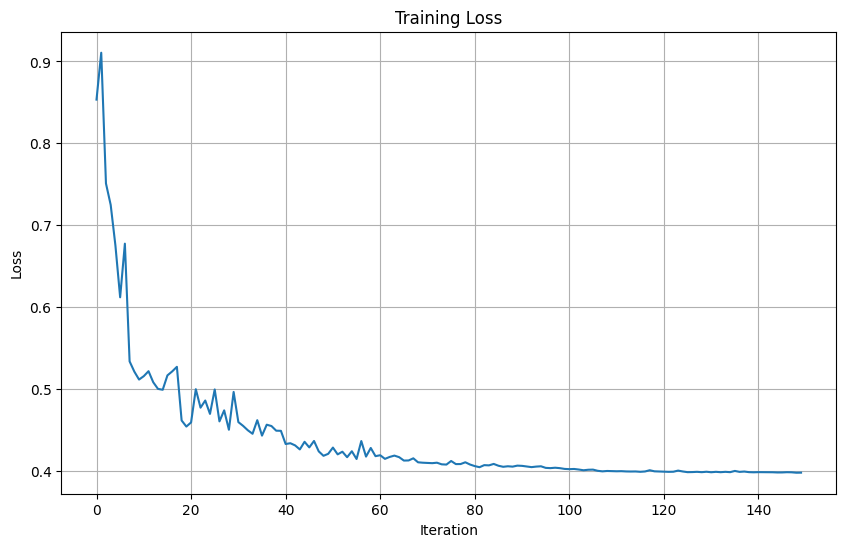

Evaluating model on test set...
Test accuracy: 0.2137
Confusion Matrix:
[[  0 228]
 [  0 103]]

Classification Report:
              precision    recall  f1-score   support

         Sad       0.00      0.00      0.00       329
       Happy       0.31      0.67      0.43       153

   micro avg       0.31      0.21      0.25       482
   macro avg       0.16      0.34      0.21       482
weighted avg       0.10      0.21      0.14       482


Model training and evaluation completed successfully!
You can now use the classify_fn function to classify new images.
Example usage: classify_fn('path/to/image.jpg')


In [54]:
def main():
    """Main function to run the complete image classification pipeline."""
    print("Starting Quantum Neural Network Image Classification")
    print("--------------------------------------------------")

    # Check environment and get base directory
    base_dir, is_colab = check_and_mount_drive()

    # Set parameters - increasing number of qubits for better representation
    target_size = (32, 32)  # Image size to resize to
    n_qubits = 4  # Increased number of qubits/features

    try:
        # Step 1: Load and prepare data
        X_train, X_test, y_train, y_test, X_orig, pca, scaler = prepare_data(
            base_dir, target_size, n_qubits
        )

        # Create and configure callback
        callback_data = {"loss": [], "step": 0}

        def callback_fn(weights, obj_func_eval):
            callback_data["loss"].append(obj_func_eval)
            callback_data["step"] += 1
            if callback_data["step"] % 5 == 0:
                print(f"Training step: {callback_data['step']}, Loss: {obj_func_eval:.6f}")

        # Step 2: Create quantum model with callback
        classifier = create_quantum_model(
            n_qubits=n_qubits,
            callback=callback_fn
        )

        # Step 3: Train and evaluate
        trained_classifier, y_pred = train_and_evaluate(
            classifier, X_train, y_train, X_test, y_test
        )

        # Step 4: Create image classifier function
        classify_fn = create_image_classifier(
            trained_classifier, pca, scaler, target_size
        )

        # Step 5: Visualize results
        #visualize_results(X_test, y_test, y_pred, X_orig, pca, scaler)

        print("\nModel training and evaluation completed successfully!")
        print("You can now use the classify_fn function to classify new images.")
        print("Example usage: classify_fn('path/to/image.jpg')")

        # Make the function available globally
        globals()['classify_image'] = classify_fn

        return classify_fn

    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        traceback.print_exc()
        return None

# Execute the main image classification pipeline
if __name__ == "__main__":
    classify_image_function = main()